## Read Multiple CSV

In [1]:
import pandas as pd

# cclass and focus dataset not used because don't have tax and mpg column
# unclean dataset is not used too
list_dataset_name = ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']

list_dataframe = []

for item in list_dataset_name:
    dataframe_temp = pd.read_csv('data/' + item + '.csv')
    
    # add new column for car type
    dataframe_temp['car'] = item
    #print(dataframe_temp.head())
    
    if item == 'hyundi':
        dataframe_temp['car'] = 'hyundai' # typo
        dataframe_temp = dataframe_temp.rename(columns = {'tax(£)': 'tax'}) # change column name
    
    list_dataframe.append(dataframe_temp)

full_dataset = pd.concat(list_dataframe)

full_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [2]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   car           99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


In [3]:
full_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [4]:
# there is an outlier in the year (2060), while the dataset was uploaded in 2020
print(full_dataset[full_dataset['year'] > 2020].count())

# some engine sizes are so small
print(full_dataset[full_dataset['engineSize'] == 0].count())

model           1
year            1
price           1
transmission    1
mileage         1
fuelType        1
tax             1
mpg             1
engineSize      1
car             1
dtype: int64
model           273
year            273
price           273
transmission    273
mileage         273
fuelType        273
tax             273
mpg             273
engineSize      273
car             273
dtype: int64


In [5]:
# remove outliers
full_dataset.drop(full_dataset[full_dataset['year'] > 2020].index, inplace = True)
full_dataset.drop(full_dataset[full_dataset['engineSize'] == 0].index, inplace = True)

full_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,97567.000000,97567.000000,97567.000000,97567.000000,97567.000000,97567.000000
mean,2017.085439,16800.193375,23081.667562,120.235428,55.032246,1.667831
std,2.114562,9870.813543,21155.951412,63.105001,14.059367,0.551369
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.600000
25%,2016.000000,9999.000000,7440.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17499.000000,145.000000,54.300000,1.600000
75%,2019.000000,20850.000000,32364.500000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## Data Exploration

In [6]:
full_dataset.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.493593,-0.741944,0.198137,-0.148704,-0.038230
price,0.493593,1.000000,-0.418163,0.308496,-0.342743,0.647524
mileage,-0.741944,-0.418163,1.000000,-0.221749,0.209740,0.108533
tax,0.198137,0.308496,-0.221749,1.000000,-0.504797,0.280701
mpg,-0.148704,-0.342743,0.209740,-0.504797,1.000000,-0.256814
engineSize,-0.038230,0.647524,0.108533,0.280701,-0.256814,1.000000


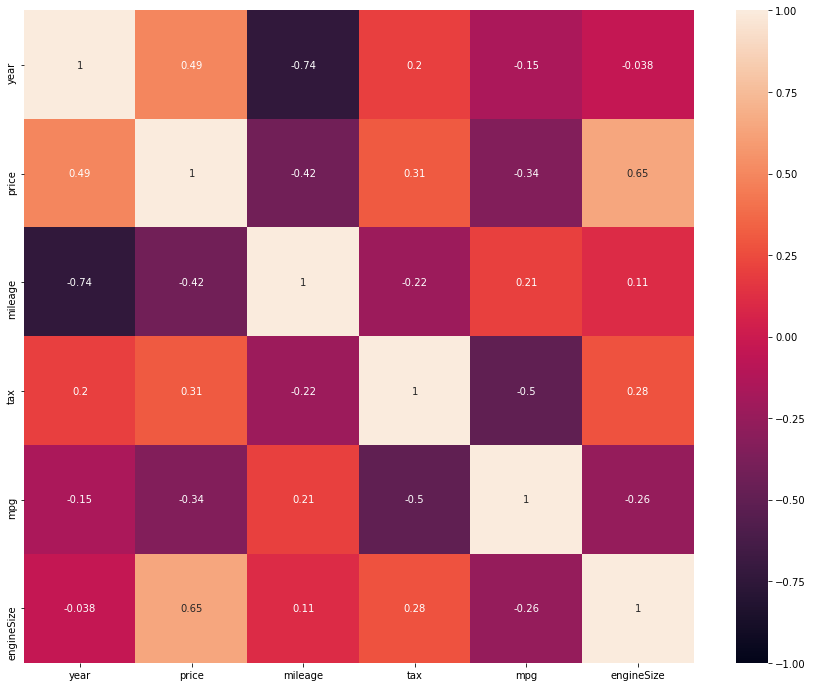

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (15, 12))
corr_map = sns.heatmap(full_dataset.corr(), annot=True, vmin=-1, vmax=1)

In [8]:
full_dataset.corr()['price'].sort_values()

mileage      -0.418163
mpg          -0.342743
tax           0.308496
year          0.493593
engineSize    0.647524
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='car', ylabel='price'>

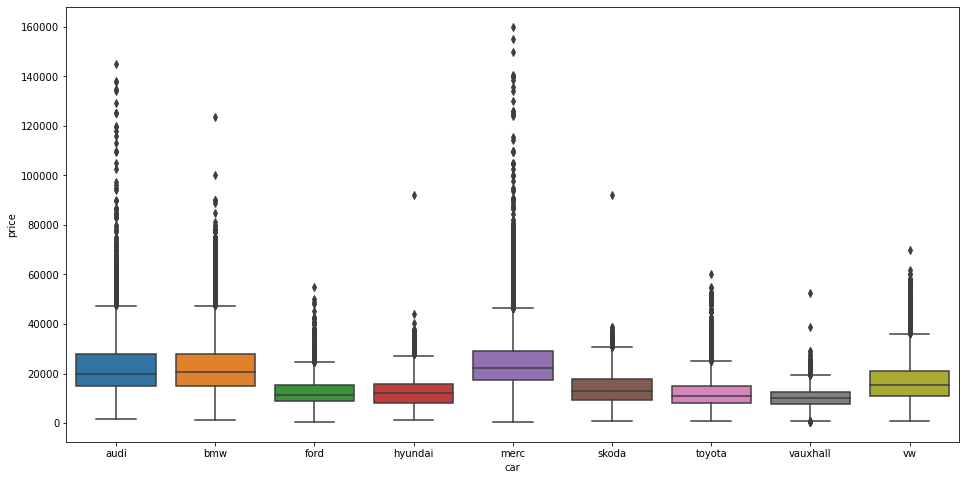

In [9]:
# boxplot car brand and price
fig, axes = plt.subplots(figsize = (16, 8))
sns.boxplot(x='car', y='price', data=full_dataset)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

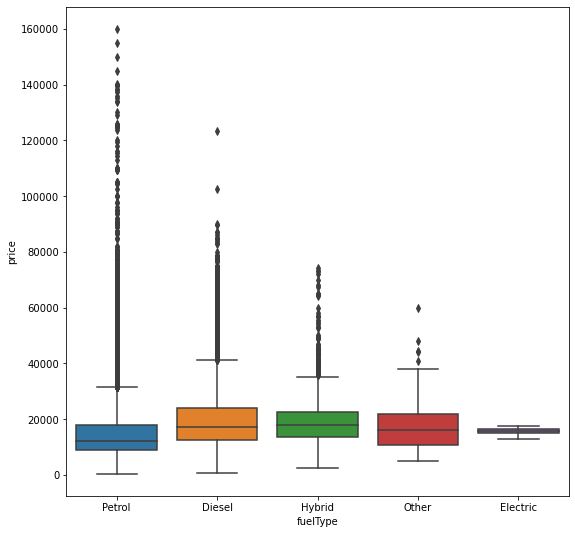

In [10]:
# boxplot fuel type and price
fig, axes = plt.subplots(figsize = (9, 9))
sns.boxplot(x='fuelType', y='price', data=full_dataset)

<AxesSubplot:xlabel='transmission', ylabel='price'>

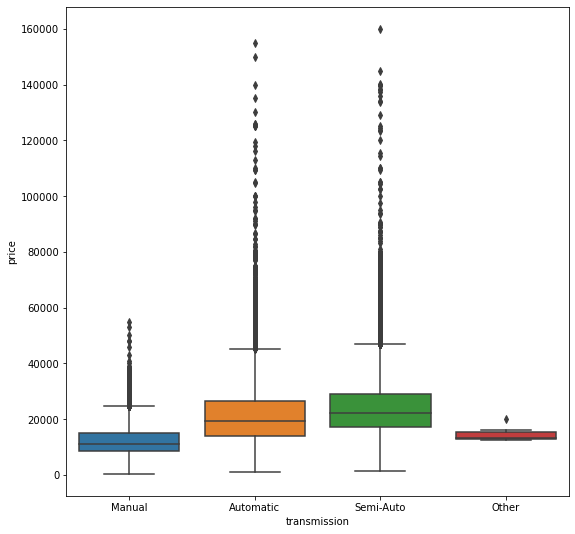

In [11]:
# boxplot transmission and price
fig, axes = plt.subplots(figsize = (9, 9))
sns.boxplot(x='transmission', y='price', data=full_dataset)

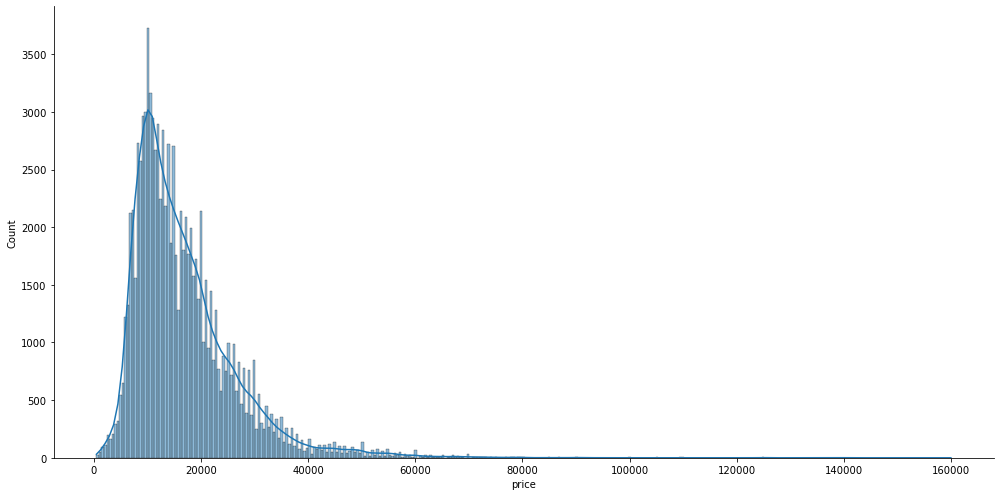

In [12]:
# price distribution plot
sns.displot(data=full_dataset, x='price', height=7, aspect=2, kde=True)

<AxesSubplot:xlabel='mileage', ylabel='price'>

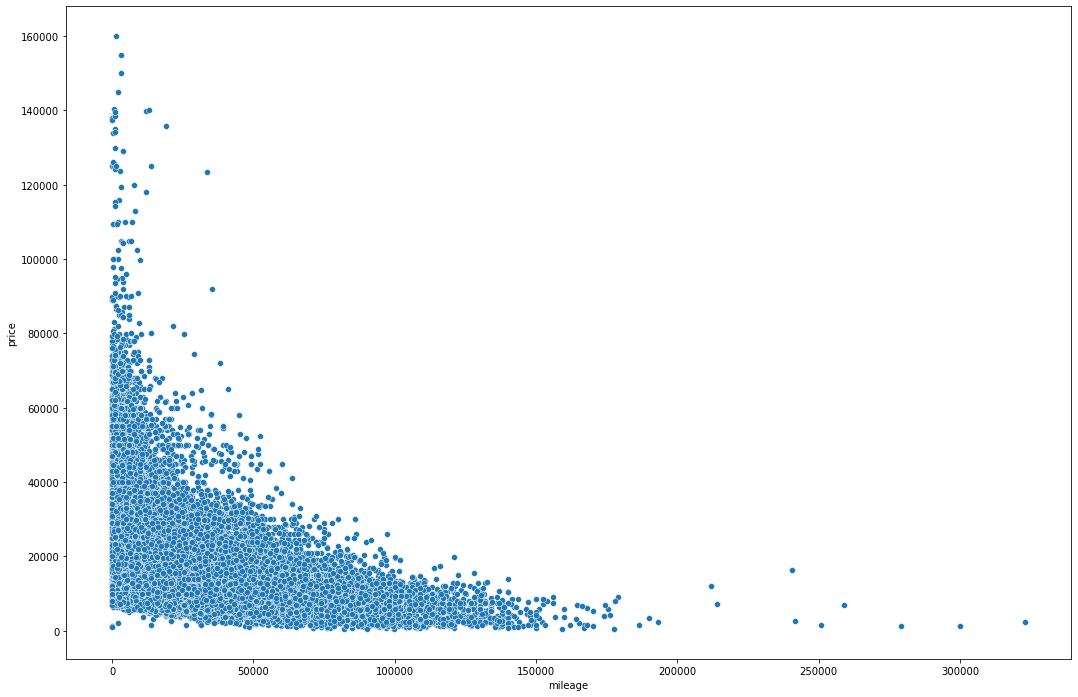

In [13]:
# scatter plot mileage and price
fig, axes = plt.subplots(figsize = (18,12))
sns.scatterplot(x='mileage', y='price', data=full_dataset)

<AxesSubplot:xlabel='engineSize', ylabel='price'>

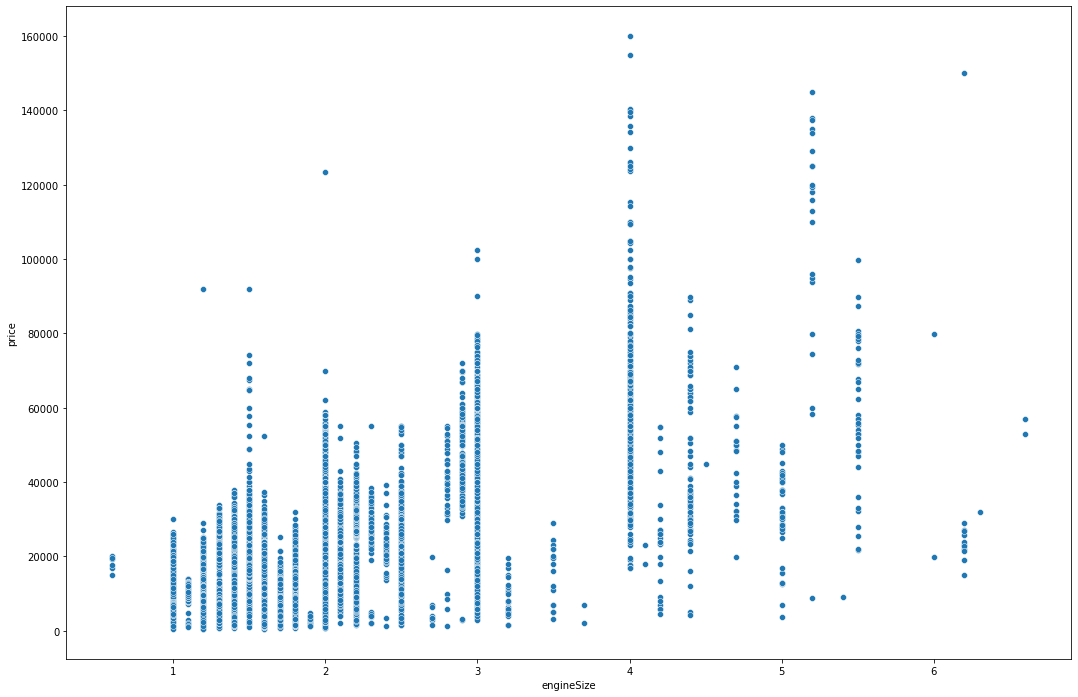

In [14]:
# scatter plot engine size and price
fig, axes = plt.subplots(figsize = (18,12))
sns.scatterplot(x='engineSize', y='price', data=full_dataset)

<AxesSubplot:xlabel='mpg', ylabel='price'>

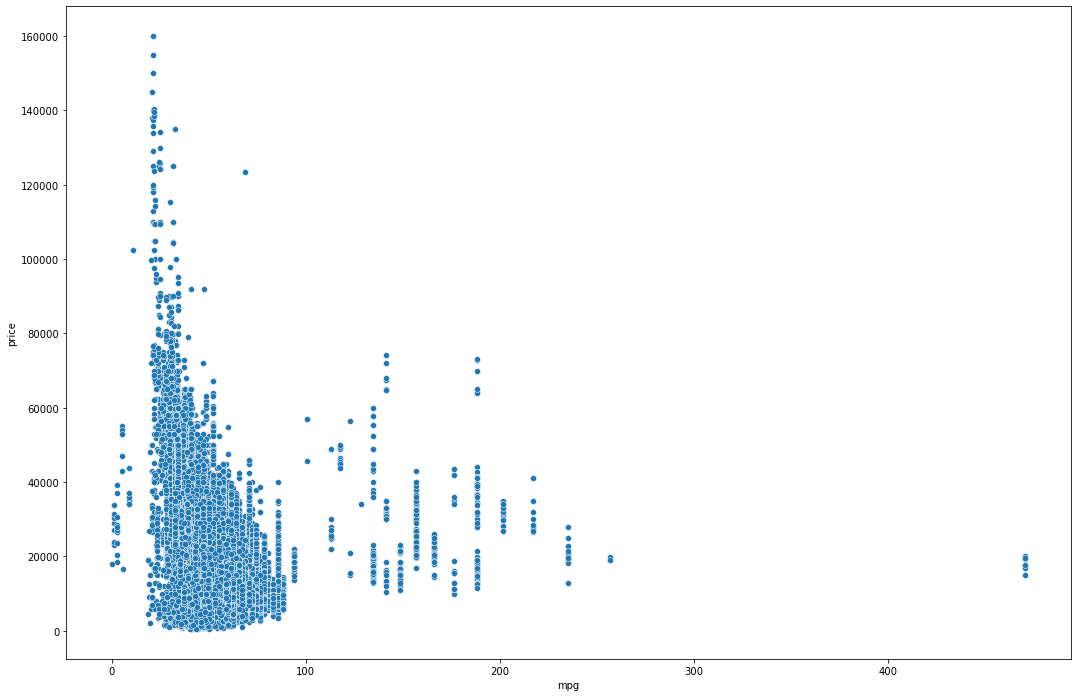

In [15]:
# scatter plot miles per gallon and price
fig, axes = plt.subplots(figsize = (18,12))
sns.scatterplot(x='mpg', y='price', data=full_dataset)

<AxesSubplot:xlabel='year', ylabel='price'>

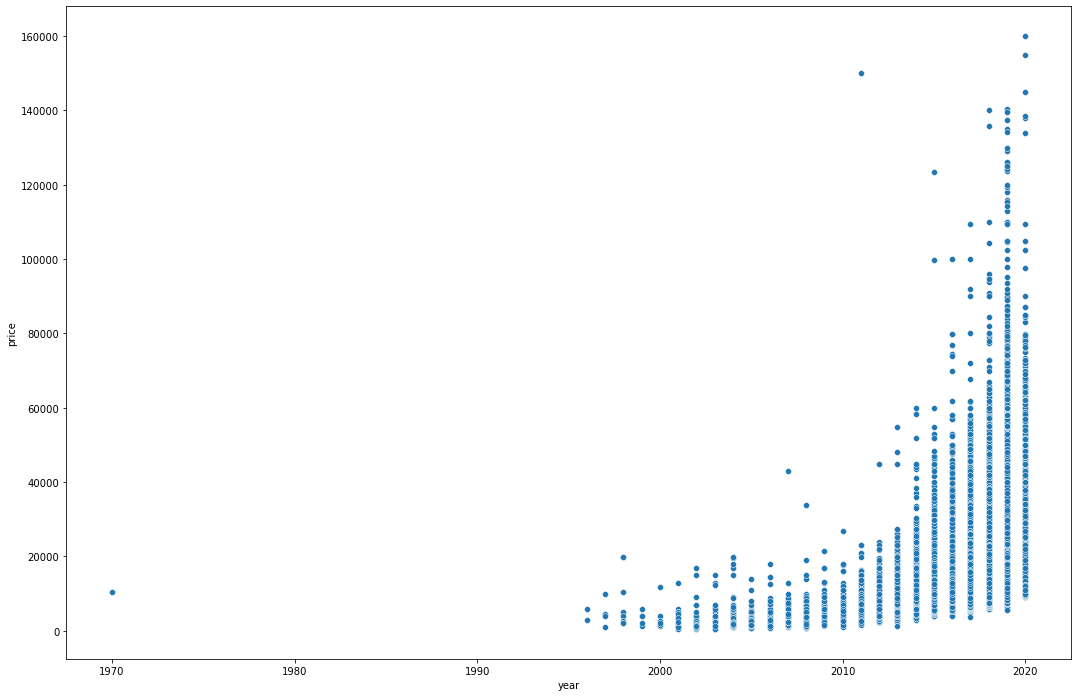

In [16]:
# scatter plot year and price
fig, axes = plt.subplots(figsize = (18,12))
sns.scatterplot(x='year', y='price', data=full_dataset)

In [17]:
# remove outliers in mpg above 400
full_dataset.drop(full_dataset[full_dataset['mpg'] > 400].index, inplace=True)

## Convert string column to int

In [18]:
full_dataset.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [19]:
def convertFuelType(row):
    if row['fuelType'] == 'Petrol':
        return 0
    elif row['fuelType'] == 'Diesel':
        return 1
    elif row['fuelType'] == 'Hybrid':
        return 2
    elif row['fuelType'] == 'Electric':
        return 3
    else: # other
        return 4

full_dataset['fuelType_int'] = full_dataset.apply(convertFuelType, axis = 1)
full_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car,fuelType_int
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi,0
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,1
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi,0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,1
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi,0
...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw,1
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw,0
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw,0
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw,0


In [20]:
full_dataset.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [21]:
def convertTransmission(row):
    if row['transmission'] == 'Manual':
        return 0
    elif row['transmission'] == 'Automatic':
        return 1
    elif row['transmission'] == 'Semi-Auto':
        return 2
    else: # other
        return 3

full_dataset['transmission_int'] = full_dataset.apply(convertTransmission, axis = 1)
full_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car,fuelType_int,transmission_int
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi,0,0
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,1,1
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi,0,0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,1,1
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw,1,0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw,0,0
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw,0,0
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw,0,0


In [22]:
model_car_list = full_dataset.model.unique()
car_model_dict = {}

i = 0
for model in model_car_list:
    car_model_dict[model] = i
    i = i + 1

def convertModel(row):
    return car_model_dict[row['model']]

full_dataset['model_int'] = full_dataset.apply(convertModel, axis=1)
full_dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car,fuelType_int,transmission_int,model_int
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi,0,0,0
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,1,1,1
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi,0,0,0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,1,1,2
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw,1,0,191
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw,0,0,192
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw,0,0,192
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw,0,0,192


## Preparing data

In [23]:
from sklearn.preprocessing import RobustScaler

col_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_int', 'fuelType_int', 'model_int']

scaler = RobustScaler()
full_dataset[col_features] = scaler.fit_transform(full_dataset[col_features])

In [24]:
df = full_dataset
df.drop('transmission', axis=1, inplace=True)
df.drop('fuelType', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)
df.drop('car', axis=1, inplace=True)

df

,year,price,mileage,tax,mpg,engineSize,fuelType_int,transmission_int,model_int
0,0.000000,12500,-0.070772,0.25,0.070064,-0.25,0.0,0.0,-1.000000
1,-0.333333,16500,0.750411,-6.25,0.630573,0.50,1.0,1.0,-0.989583
2,-0.333333,11000,0.499378,-5.75,0.070064,-0.25,0.0,0.0,-1.000000
3,0.000000,16800,0.339137,0.00,0.828025,0.50,1.0,1.0,-0.979167
4,0.666667,17300,-0.621906,0.00,-0.299363,-0.75,0.0,0.0,-0.968750
...,...,...,...,...,...,...,...,...,...
15152,-1.666667,5990,2.266841,-1.00,0.292994,0.50,1.0,0.0,0.989583
15153,-3.000000,1799,2.832618,0.00,-0.509554,-0.50,0.0,0.0,1.000000
15154,-2.666667,1590,2.106359,2.75,-0.783439,-0.25,0.0,0.0,1.000000
15155,-3.666667,1250,2.616048,0.25,-0.509554,-0.50,0.0,0.0,1.000000


In [25]:
label = df['price'].values
features = df.drop('price', axis=1).values

## Split dataset

In [26]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(features, label, test_size=0.2, random_state=0)

## Creating model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression With Car Model

In [30]:
# Linear Regression
linear_regression = LinearRegression()

# train model
linear_regression.fit(train_data, train_label)

# predict
result = linear_regression.predict(test_data)

In [31]:
# evaluate r2
print('R square score for Linear Regression: ', r2_score(test_label, result))

# evaluate RMSE
print('Root Mean Squared Error for Linear Regression: ', mean_squared_error(test_label, result, squared=False))

R square score for Linear Regression:  0.7409461010220665
Root Mean Squared Error for Linear Regression:  4961.8173264707475


## Polynominal Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial regression 
poly_reg = PolynomialFeatures(degree = 4)

# prepare polynomial features
x_poly = poly_reg.fit_transform(features, label)

# train model
linear_regression_2 = LinearRegression()
linear_regression_2.fit(x_poly, label)

# make preedictions
result = linear_regression_2.predict(x_poly)

In [33]:
# evaluate r2
print('R square score for Linear Regression: ', r2_score(label, result))

# evaluate RMSE
print('Root Mean Squared Error for Linear Regression: ', mean_squared_error(label, result, squared=False))

R square score for Linear Regression:  0.8804576446107855
Root Mean Squared Error for Linear Regression:  3412.6142389110923


## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

# random forest regression
random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state = 0)
random_forest_reg.fit(train_data, train_label)

# prediction
result = random_forest_reg.predict(test_data)

In [35]:
# evaluate r2
print('R square score for Linear Regression: ', r2_score(test_label, result))

# evaluate RMSE
print('Root Mean Squared Error for Linear Regression: ', mean_squared_error(test_label, result, squared=False))

R square score for Linear Regression:  0.9552033970580097
Root Mean Squared Error for Linear Regression:  2063.327875083633


## Support Vector Regression

In [59]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

standard_scaler_1 = StandardScaler()
scaled_data_train = standard_scaler_1.fit_transform(train_data)
scaled_data_test = standard_scaler_1.transform(test_data) # not learn just transform

standard_scaler_2 = StandardScaler()
scaled_label_train = np.ravel(standard_scaler_2.fit_transform(train_label.reshape(-1, 1)))
scaled_label_test = np.ravel(standard_scaler_2.fit_transform(test_label.reshape(-1, 1)))

In [60]:
# train model
svr_regression = SVR(kernel='rbf') # other kernel types : linear, poly, rbf, sigmoid
svr_regression.fit(scaled_data_train, scaled_label_train)

# predict
result = svr_regression.predict(scaled_data_test)

In [61]:
# evaluate r2
print('R square score for Linear Regression: ', r2_score(scaled_label_test, result))

# evaluate RMSE
print('Root Mean Squared Error for Linear Regression: ', mean_squared_error(scaled_label_test, result, squared=False))

R square score for Linear Regression:  0.8786371645670862
Root Mean Squared Error for Linear Regression:  0.34837169149188024


## Result

Best result was obtained on **Random Forest Regression** with **0.9552 r2(square)** and **2063.3278 RMSE** score